# Import Libraries 

In [17]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places

#pd.options.display.float_format = '{:.6f}'.format

#from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
#from sklearn.neighbors import NearestNeighbors
#from sklearn.decomposition import TruncatedSVD
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score


# Import dataset

In [18]:
# aniList = pd.read_csv(io.BytesIO(uploaded['AnimeList.csv']))
url = 'https://raw.githubusercontent.com/Ninelie-Nananai/AnimeListApi/main/AnimeList.csv'
aniList = pd.read_csv(url)
data = aniList.copy()
data2 = aniList.copy()

In [19]:
data2.head(1)

anime_id          title              title_english title_japanese  \
0     11013  Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   

    title_synonyms                                          image_url type  \
0  Youko x Boku SS  https://myanimelist.cdn-dena.com/images/anime/...   TV   

  source  episodes           status  airing                  aired_string  \
0  Manga        12  Finished Airing   False  Jan 13, 2012 to Mar 30, 2012   

                                        aired         duration  \
0  {'from': '2012-01-13', 'to': '2012-03-30'}  24 min. per ep.   

                      rating  score  scored_by    rank  popularity  members  \
0  PG-13 - Teens 13 or older   7.63     139250  1274.0         231   283882   

   favorites                                         background    premiered  \
0       2809  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   

             studio                                   genre  \
0  David Production  Comedy, Supernatural, Romance, Shounen   

           opening_theme                                       ending_theme  
0  ['"Nirvana" by MUCC']  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...

# Observe data

In [20]:
aniList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [21]:
aniList.isna().sum()

anime_id              0
title                 0
title_english      8754
title_japanese       35
title_synonyms     5541
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1574
popularity            0
members               0
favorites             0
background        13421
premiered         10382
broadcast         10207
related               0
producer           6190
licensor          11105
studio             5934
genre                64
opening_theme         0
ending_theme          0
dtype: int64

In [22]:
(aniList.isna().sum()/aniList.shape[0])

# มีข้อมูลที่เป็น null ไม่ถึง 1%

anime_id          0.000000
title             0.000000
title_english     0.604642
title_japanese    0.002417
title_synonyms    0.382719
image_url         0.006631
type              0.000000
source            0.000000
episodes          0.000000
status            0.000000
airing            0.000000
aired_string      0.000000
aired             0.000000
duration          0.000000
rating            0.000000
score             0.000000
scored_by         0.000000
rank              0.108717
popularity        0.000000
members           0.000000
favorites         0.000000
background        0.926993
premiered         0.717088
broadcast         0.705001
related           0.000000
producer          0.427545
licensor          0.767026
studio            0.409863
genre             0.004421
opening_theme     0.000000
ending_theme      0.000000
dtype: float64

### EDA

In [23]:
aniList.sample(3)

anime_id                                     title  \
4170      7060                            Ring of Gundam   
7799      7021                          Ni-hiki no Sanma   
4189      4070  Black Jack: Dr. Pinoko no Mori no Bouken   

                                title_english          title_japanese  \
4170                           Ring of Gundam             リング　オブ　ガンダム   
7799                                      NaN                  二匹のサンマ   
4189  Black Jack: Dr. Pinoco&#039;s Adventure  ブラック・ジャック Dr. ピノコの森の冒険   

             title_synonyms  \
4170                    NaN   
7799  Two Pikes, Two Fishes   
4189                    NaN   

                                              image_url     type    source  \
4170  https://myanimelist.cdn-dena.com/images/anime/...  Special  Original   
7799  https://myanimelist.cdn-dena.com/images/anime/...    Movie  Original   
4189  https://myanimelist.cdn-dena.com/images/anime/...    Movie   Unknown   

      episodes           status  airing  aired_string  \
4170         1  Finished Airing   False  Aug 29, 2009   
7799         1  Finished Airing   False          1961   
4189         1  Finished Airing   False  Dec 17, 2005   

                                           aired duration        rating  \
4170  {'from': '2009-08-29', 'to': '2009-08-29'}   5 min.  G - All Ages   
7799                  {'from': None, 'to': None}  22 min.  G - All Ages   
4189  {'from': '2005-12-17', 'to': '2005-12-17'}   7 min.  G - All Ages   

      score  scored_by    rank  popularity  members  favorites background  \
4170   5.33       1215  8642.0        5965     2991          5        NaN   
7799   5.05        245  8997.0        9795      430          0        NaN   
4189   6.38        534  6060.0        7423     1518          1        NaN   

     premiered broadcast                                            related  \
4170       NaN       NaN  {'Parent story': [{'mal_id': 80, 'type': 'anim...   
7799       NaN       NaN  {'Alternative version': [{'mal_id': 29701, 'ty...   
4189       NaN       NaN  {'Parent story': [{'mal_id': 1983, 'type': 'an...   

                    producer licensor   studio                 genre  \
4170    Robot Communications      NaN  Sunrise  Sci-Fi, Space, Mecha   
7799  Kuri Jikken Manga Kobo      NaN      NaN                Comedy   
4189      Tezuka Productions      NaN      NaN                Comedy   

     opening_theme ending_theme  
4170            []           []  
7799            []           []  
4189            []           []

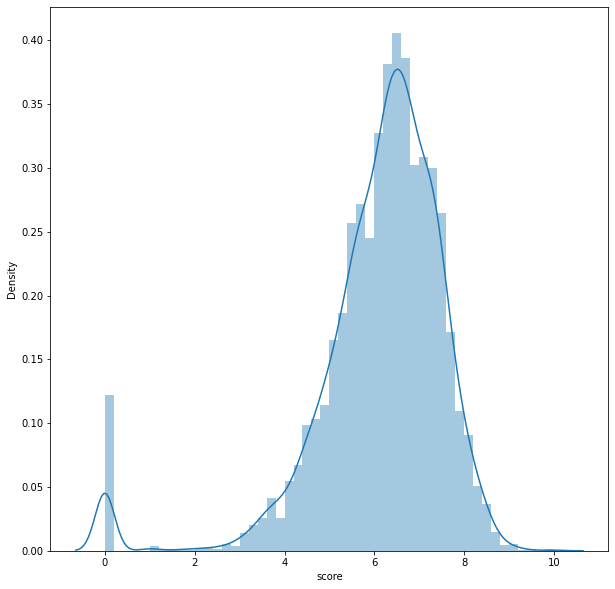

In [24]:
# score ใน dataset นี้

plt.figure(figsize=(10,10))
sns.distplot(aniList['score']);

คะแนนที่เยอะที่สุดจะอยู่ระหว่าง 5-7 คะแนน
น้อยสุด 1-3 และ 9-10

0 คะแนนมีค่อนข้างเยอะเพราะใน dataset นี้รวม anime ที่ไม่ได้เป็นทางการเข้าไปด้วย

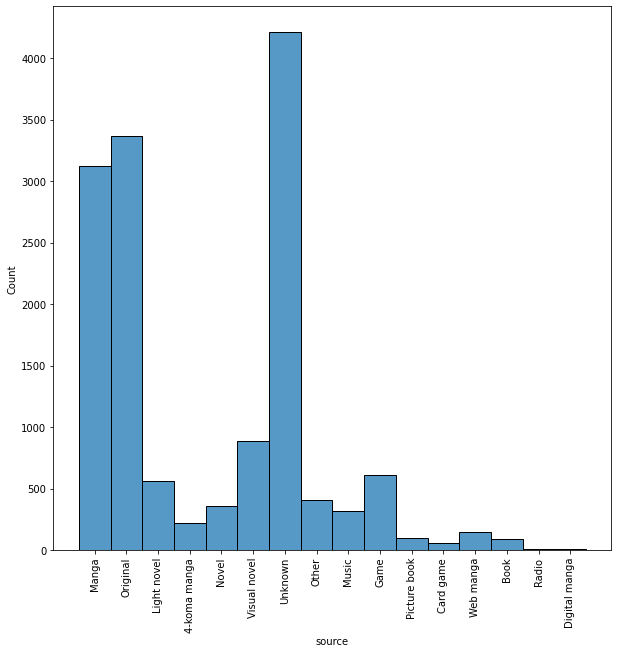

In [25]:
# จำนวนของ source ที่มา ทั้งหมดที่มีใน dataset

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.histplot(aniList, x='source');

### อันดับ 1 Unknown (เป็นอนิเมะที่ไม่เป็นทางการ ประเภท Doujin ที่ทำขึ้นมาเองไม่ได้ผ่านบริษัท หรือ Indie)
### อันดับ 2 Original (สร้างโดยบริษัทผลิตอนิเมะเอง ไม่ได้สร้างจาก Manga หรือ Novel)
### อันดับ 3 Manga (สร้างจาก Manga)

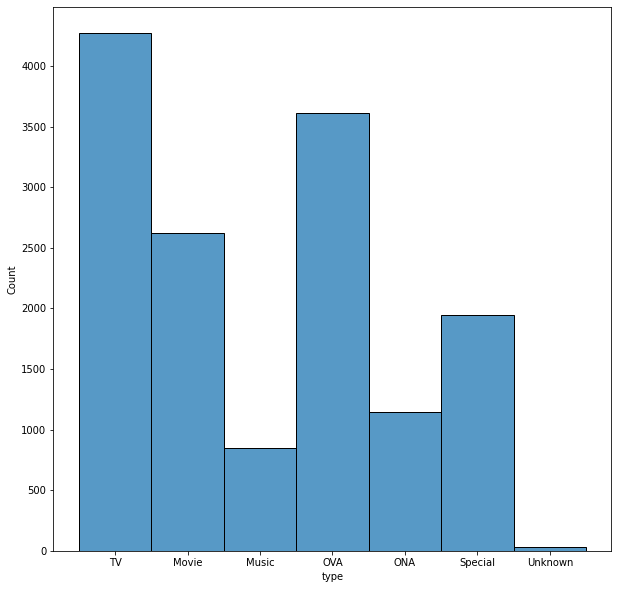

In [26]:
# จำนวนของ type ทั้งหมดที่มีใน dataset

plt.figure(figsize=(10,10))
sns.histplot(aniList, x='type');

### อันดับ 1. TV (เพราะอนิเมะในญี่ปุ่นฉายผ่าน TV เป็นหลัก แล้วค่อยนำออกมาขายผ่าน DVD หรือ Blu-ray)
### อันดับ 2. OVA (ตอนพิเศษของอนิเมะที่ส่วนมากไม่เกี่ยวกับเนื้อเรื่อง)
### อันดับ 3. Movie (ฉายในโรงหนัง)

In [27]:
# Unknown คือเรื่องอะไร

WhatIsUnknownType = aniList.loc[aniList['type'] == 'Unknown']
WhatIsUnknownType[['title', 'type', 'studio', 'producer', 'source']].head(10)

# น่าจะเป็นอนิเมะที่ไม่เป็นทางการ ประเภท Doujin ที่ทำขึ้นมาเองไม่ได้ผ่านบริษัท หรือเป็น Indie

title     type      studio  \
187                                  Sidonia no Kishi 3  Unknown         NaN   
511      Fate/Extra: Last Encore - Irusterias Tendouron  Unknown         NaN   
1396                                    Hatena☆Illusion  Unknown         NaN   
1989                                      Kenja no Mago  Unknown         NaN   
2326     Soukyuu no Fafner: Dead Aggressor - The Beyond  Unknown  Xebec Zwei   
2456                                      Kengan Ashura  Unknown         NaN   
3235                             Ginga Jinpuu Jinraiger  Unknown         NaN   
3292  Watashi, Nouryoku wa Heikinchi de tte Itta yo ne!  Unknown         NaN   
3836                            Gi(a)rlish Number Shura  Unknown         NaN   
4064                                          Ten Count  Unknown         NaN   

        producer        source  
187          NaN         Manga  
511          NaN          Game  
1396         NaN   Light novel  
1989         NaN   Light novel  
2326         NaN      Original  
2456         NaN         Manga  
3235  Studio GDW      Original  
3292         NaN   Light novel  
3836         NaN  4-koma manga  
4064         NaN         Manga

In [28]:
TopTenAnime = aniList.loc[aniList['rank']> 0.0]
TopTenAnime[['rank', 'title', 'score']].sort_values('rank', ascending=True).head(10)

rank                             title  score
2555    1.0  Fullmetal Alchemist: Brotherhood   9.25
1028    2.0                    Kimi no Na wa.   9.19
1252    3.0                          Gintama°   9.15
6177    4.0                     Steins;Gate 0   9.15
2999    5.0                       Steins;Gate   9.14
12724   6.0              Ginga Eiyuu Densetsu   9.11
8992    7.0                     Gintama&#039;   9.11
418     8.0            Hunter x Hunter (2011)   9.11
1307    9.0        3-gatsu no Lion 2nd Season   9.10
5783   10.0          Gintama&#039;: Enchousen   9.07

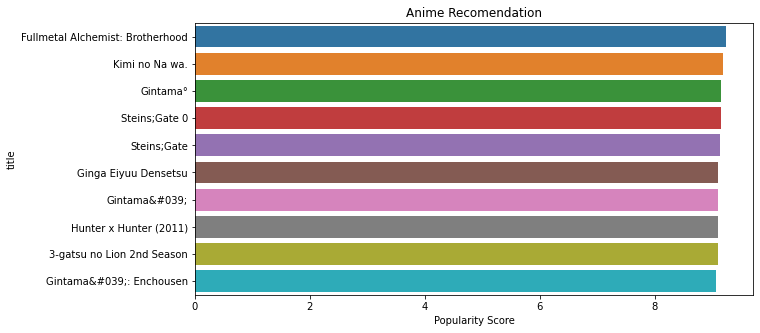

In [30]:
tmpTopTenAnime=TopTenAnime[['rank', 'title', 'score']].sort_values('rank', ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(tmpTopTenAnime['score'],tmpTopTenAnime['title'])
plt.title('Anime Recomendation')
plt.xlabel('Popularity Score')
plt.show()

อนิเมะที่ได้รับความนิยมมากที่สุด

1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Gintama
4. Steins;Gate 0

In [31]:
TopTenAnime[['title', 'score','scored_by']].loc[TopTenAnime['title'] == "Steins;Gate"].head()

title  score  scored_by
2999  Steins;Gate   9.14     563857

In [32]:
TopTenAnime[['title', 'score', 'scored_by']].loc[TopTenAnime['title'] == "Gintama°"].head()

title  score  scored_by
1252  Gintama°   9.15      71751

### เมื่อลอง head ออกมา จะเห็นว่า Steins;Gate มีคะแนน 9.14 ซึงน้อยกว่า Gintama 0.01 คะแนนแต่ คนที่โหวดให้ Ginnama กับมีน้อยกว่า Steins;Gate

In [34]:

rating1 = data2[['anime_id','title', 'genre','scored_by','score']]
rating1.drop_duplicates(subset=['anime_id'],inplace=True)
rating1.reset_index(drop=True,inplace=True)

In [35]:
rating1.shape

(14478, 5)

In [36]:
# ค่าเฉลี่ยนของคะแนนโดยรวม
C = rating1['score'].mean()

# เรื่องที่มีอัตราการนับคะแนนโดยรวมมากกว่า 85%
m = rating1['scored_by'].quantile(0.85)
print('m: ', m, 'C: ', C)

m:  12584.449999999999 C:  6.142481696366902


In [37]:
def Iighted_rating(x, m=m, C=C):
    v = x['scored_by']
    R = x['score']
    return (v/(v+m) * R) + (m/(m+v) * C)

    # คำนวณ

In [38]:
# animes having total rate count greater than 85% is considered into lists_animes
lists_animes =rating1.copy().loc[rating1['scored_by'] >= m]
lists_animes.shape

(2172, 5)

In [39]:
# Define a new feature 'score' and calculate its value with `Iighted_rating()`
lists_animes['trusted_score'] = lists_animes.apply(Iighted_rating, axis=1)

In [41]:
#Sort movies based on score calculated above
lists_animes = lists_animes.sort_values('trusted_score', ascending=False)

In [42]:
# TOP 10 Most popular anime by trusted score
lists_animes[['title', 'genre', 'scored_by', 'score', 'trusted_score']].head()

title  \
2555  Fullmetal Alchemist: Brotherhood   
1028                    Kimi no Na wa.   
2999                       Steins;Gate   
418             Hunter x Hunter (2011)   
6572                    Koe no Katachi   

                                                  genre  scored_by  score  \
2555  Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028               Supernatural, Drama, Romance, School     471398   9.19   
2999                                   Thriller, Sci-Fi     563857   9.14   
418             Action, Adventure, Super Power, Shounen     403377   9.11   
6572                             Drama, School, Shounen     296261   9.04   

      trusted_score  
2555       9.197591  
1028       9.110759  
2999       9.074560  
418        9.020221  
6572       8.921936

### อันดับจริงๆ ของอนิเมะแต่ละเรื่องคำนวณจาก คนที่มาโหวดด้วย
จะเห็นว่าต่างจากก่อนหน้า เมื่อนำจำนวนคนที่มาโหวดด้วย

ก่อน
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Gintama
4. Steins;Gate 0

หลัง
1. Fullmetal Alchemist: Brotherhood
2. Kimi no Na wa.
3. Steins;Gate
4. Hunter x Hunter (2011)

EDA 1

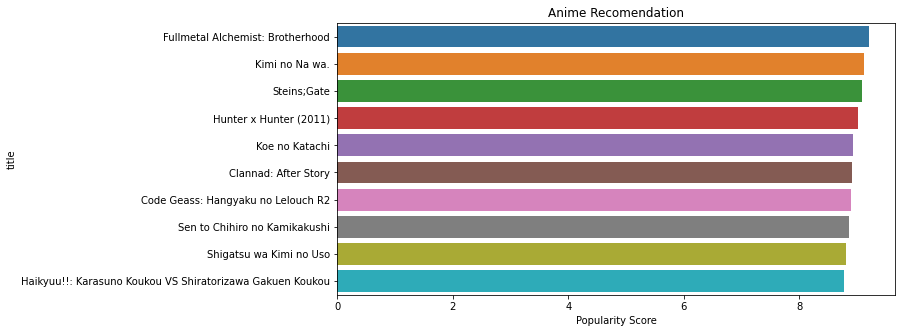

In [43]:
pop=lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10)
plt.figure(figsize=(10,5))
sns.barplot(pop['trusted_score'],pop['title'])
plt.title('Anime Recomendation')
plt.xlabel('Popularity Score')
plt.show()

# ตัวอย่าง eda 1

EDA 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fullmetal Alchemist: Brotherhood'),
  Text(1, 0, 'Kimi no Na wa.'),
  Text(2, 0, 'Steins;Gate'),
  Text(3, 0, 'Hunter x Hunter (2011)'),
  Text(4, 0, 'Koe no Katachi'),
  Text(5, 0, 'Clannad: After Story'),
  Text(6, 0, 'Code Geass: Hangyaku no Lelouch R2'),
  Text(7, 0, 'Sen to Chihiro no Kamikakushi'),
  Text(8, 0, 'Shigatsu wa Kimi no Uso'),
  Text(9, 0, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou')])

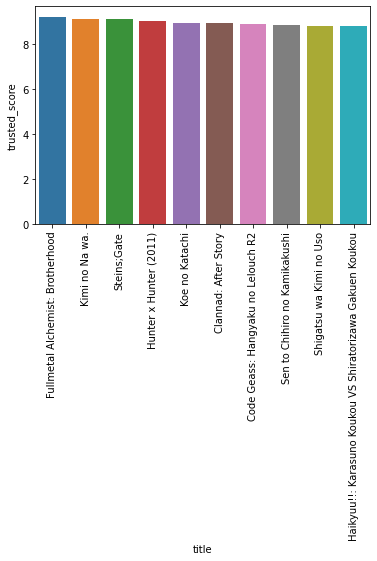

In [44]:
sns.barplot(data=lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10), x='title',y='trusted_score');
plt.xticks(rotation=90)

# ตัวอย่าง eda 2



### **Content based Recomendation **

In [45]:
lists_animes.head()

anime_id                             title  \
2555      5114  Fullmetal Alchemist: Brotherhood   
1028     32281                    Kimi no Na wa.   
2999      9253                       Steins;Gate   
418      11061            Hunter x Hunter (2011)   
6572     28851                    Koe no Katachi   

                                                  genre  scored_by  score  \
2555  Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028               Supernatural, Drama, Romance, School     471398   9.19   
2999                                   Thriller, Sci-Fi     563857   9.14   
418             Action, Adventure, Super Power, Shounen     403377   9.11   
6572                             Drama, School, Shounen     296261   9.04   

      trusted_score  
2555       9.197591  
1028       9.110759  
2999       9.074560  
418        9.020221  
6572       8.921936

In [46]:
def combine_string(row):
  res = [str(r) for r in row]
  return ' | '.join(res)
  # ฟังก์ชัน combine string

In [47]:
data3=aniList.copy()

cb = ['genre','type','episodes'] # 

data3['describe'] = data3[cb].apply(combine_string,axis = 1)
data3['describe'].fillna(' ')
data3.head()

# สร้าง dataset ใหม่ ชื่อ data3 และเพิ่ม column ใหม่คือ describe ซึ่งเอา genre type episodes มาผสมกัน

# considering the anime content
#data3['describe']=data3['genre'],data3['type'],data3['episodes']
#data3['describe'].fillna(' ')
#data3.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  airing                  aired_string  \
0  Finished Airing   False  Jan 13, 2012 to Mar 30, 2012   
1  Finished Airing   False    Apr 2, 2007 to Oct 1, 2007   
2  Finished Airing   False   Oct 4, 2008 to Sep 25, 2009   
3  Finished Airing   False  Aug 16, 2002 to May 23, 2003   
4  Finished Airing   False   Oct 6, 2012 to Mar 30, 2013   

                                        aired         duration  \
0  {'from': '2012-01-13', 'to': '2012-03-30'}  24 min. per ep.   
1  {'from': '2007-04-02', 'to': '2007-10-01'}  24 min. per ep.   
2  {'from': '2008-10-04', 'to': '2009-09-25'}  24 min. per ep.   
3  {'from': '2002-08-16', 'to': '2003-05-23'}  16 min. per ep.   
4  {'from': '2012-10-06', 'to': '2013-03-30'}  24 min. per ep.   

                      rating  score  scored_by    rank  popularity  members  \
0  PG-13 - Teens 13 or older   7.63     139250  1274.0         231   283882   
1  PG-13 - Teens 13 or older   7.89      91206   727.0         366   204003   
2              PG - Children   7.55      37129  1508.0        1173    70127   
3  PG-13 - Teens 13 or older   8.21      36501   307.0         916    93312   
4  PG-13 - Teens 13 or older   8.67     107767    50.0         426   182765   

   favorites                                         background    premiered  \
0       2809  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   
1       2579                                                NaN  Spring 2007   
2        802                                                NaN    Fall 2008   
3       3344  Princess Tutu aired in two parts. The first pa...  Summer 2002   
4       2082                                                NaN    Fall 2012   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1             Unknown  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2             Unknown  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  Fridays at Unknown  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4             Unknown  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance,

In [48]:
data3.drop_duplicates(subset=['title'],inplace=True)
# ดรอปตัวซ้ำ

In [49]:
data3.shape
# row, col check

(14477, 32)

In [50]:
data3.reset_index(drop=True,inplace=True)

In [51]:
tf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix = tf.fit_transform(data3['describe'])
tf_matrix.shape

(14477, 1654)

In [52]:
# ตัวแปรพวก TfidfVectorizer  ,linear_kernel ,cosine_similarity คืออัลกอริทึมการหาค่าเฉลี่ยความถี่ของตัวอักษรภาษา eng ต่างๆในข้อมูล 


#simil = linear_kernel(tf_matrix, tf_matrix) # คล้ายๆกัน ไม่รู้ต่างกันยังไง
simil = cosine_similarity(tf_matrix,tf_matrix) # คล้ายๆกัน ไม่รู้ต่างกันยังไง ใช้ได้สองแบบ

simil.shape

(14477, 14477)

In [53]:
id=data3['anime_id'].values



simil = pd.DataFrame(simil, index=id, columns=id)

simil.columns = data3['title']

simil['anime_name'] = data3['title'].values

#  คำนวณค่าเฉลี่ยต่างๆจาก algo TfidfVectorizer

In [54]:
simil.head()
#  

title  Inu x Boku SS  Seto no Hanayome  Shugo Chara!! Doki  Princess Tutu  \
11013       1.000000          0.212981            0.040323       0.077579   
2104        0.212981          1.000000            0.081322       0.070021   
5262        0.040323          0.081322            1.000000       0.081862   
721         0.077579          0.070021            0.081862       1.000000   
12365       0.421947          0.213368            0.040396       0.199782   

title  Bakuman. 3rd Season  Yume-iro Pâtissière  Ultra Maniac  \
11013             0.421947             0.023686      0.088704   
2104              0.213368             0.069479      0.370707   
5262              0.040396             0.369525      0.430791   
721               0.199782             0.018728      0.121859   
12365             1.000000             0.023729      0.088865   

title  Shakugan no Shana II (Second)  Nodame Cantabile: Paris-hen  \
11013                       0.109552                     0.069743   
2104                        0.172679                     0.062948   
5262                        0.056555                     0.028662   
721                         0.096759                     0.055144   
12365                       0.093580                     0.069870   

title  Ouran Koukou Host Club  Junjou Romantica 2  Kaichou wa Maid-sama!  \
11013                0.085260            0.409372               0.101070   
2104                 0.356315            0.114489               0.422389   
5262                 0.359138            0.035009               0.425736   
721                  0.067413            0.173139               0.079914   
12365                0.085415            0.525628               0.101254   

title  Sekaiichi Hatsukoi 2  Tonari no Kaibutsu-kun    Bleach   Chobits  \
11013              0.409372                0.089538  0.159952  0.075905   
2104               0.114489                0.217499  0.107987  0.201348   
5262               0.035009                0.377161  0.026218  0.031194   
721                0.173139                0.070796  0.023730  0.154275   
12365              0.525628                0.089701  0.119861  0.287626   

title  Kimi ni Todoke  Naruto: Shippuuden   Ranma ½  Toradora!  \
11013        0.064090            0.111136  0.030188   0.094332   
2104         0.182056            0.100308  0.027247   0.229143   
5262         0.327647            0.024353  0.026372   0.086624   
721          0.077868            0.022042  0.108622   0.074586   
12365        0.448503            0.111338  0.030243   0.385563   

title  Bakuman. 2nd Season  Gakuen Alice  Skip Beat!  Chihayafuru 2  \
11013             0.421947      0.037648    0.095737       0.015133   
2104              0.213368      0.215981    0.086410       0.044392   
5262              0.040396      0.242863    0.222940       0.042966   
721               0.199782      0.029767    0.194582       0.031560   
12365             1.000000      0.037716    0.658171       0.220895   

title  Shounen Onmyouji  Chihayafuru  Itazura na Kiss  Beelzebub  \
11013          0.057113     0.015133         0.103686   0.172359   
2104           0.127262     0.044392         0.093584   0.235898   
5262           0.178886     0.042966         0.241449   0.063127   
721            0.069562     0.031560         0.081982   0.025570   
12365          0.016595     0.220895         0.423794   0.129159   

title  Hanasakeru Seishounen  SKET Dance  B-gata H-kei  Crayon Shin-chan  \
11013               0.077223    0.165335      0.209750          0.042547   
2104                0.069699    0.302522      0.123208          0.085809   
5262                0.210116    0.080956      0.079301          0.083052   
721                 0.093824    0.032792      0.068280          0.033641   
12365               0.237905    0.165636      0.086514          0.042625   

title  Fruits Basket  Saiunkoku Monogatari  One Piece  Glass no Kamen (2005)  \
11013       0.081034              0.073753   0.151378

In [55]:
if([simil.anime_name.value_counts()>1]==True):
    print('row duplicate')
else:
    print('no row duplicate')

# เช็คข้อมูลอีกรอบ

There are no duplicate rows


In [56]:
# โชว์รายการที่ใกล้เคียงกับชื่ออนิเมะที่กรอกโดยอิงจาก genre

def content_rec(name):
    idex = simil[simil['anime_name']==name]

    idex = idex.drop('anime_name', axis=1).T

    idex.columns = ['similar_anime']
    
    idex['similar_by_genre'] = data3['genre'].values
    
    idex = idex.sort_values(by='similar_anime', ascending=False)

    return pd.DataFrame(idex.head(10))

In [57]:
content_rec('Fairy Tail')

similar_anime  \
title                                                  
Fairy Tail                                  1.000000   
Fairy Tail (2018)                           0.701338   
Fairy Tail Movie 2: Dragon Cry              0.604152   
Slayers: The Motion Picture                 0.558761   
Dokidoki♡Densetsu: Mahoujin Guruguru        0.516489   
Mahoujin Guruguru                           0.505420   
Black Clover                                0.499698   
Black Clover: Jump Festa 2016 Special       0.484928   
Otogi Juushi Akazukin OVA                   0.465064   
Densetsu no Yuusha no Densetsu              0.453066   

                                                                        similar_by_genre  
title                                                                                     
Fairy Tail                             Action, Adventure, Comedy, Magic, Fantasy, Sho...  
Fairy Tail (2018)                      Action, Adventure, Comedy, Magic, Fantasy, Sho...  
Fairy Tail Movie 2: Dragon Cry         Action, Adventure, Comedy, Magic, Fantasy, Sho...  
Slayers: The Motion Picture                   Adventure, Comedy, Magic, Fantasy, Shounen  
Dokidoki♡Densetsu: Mahoujin Guruguru          Adventure, Comedy, Magic, Fantasy, Shounen  
Mahoujin Guruguru                             Adventure, Comedy, Magic, Fantasy, Shounen  
Black Clover                                     Action, Comedy, Magic, Fantasy, Shounen  
Black Clover: Jump Festa 2016 Special            Action, Comedy, Magic, Fantasy, Shounen  
Otogi Juushi Akazukin OVA                              Adventure, Comedy, Magic, Fantasy  
Densetsu no Yuusha no Densetsu                Action, Adventure, Magic, Fantasy, Shounen